In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 한글 폰트 문제 해결
# matplotlib는 한글폰트를 지원하지 않음
# is정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline
# uniccode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #os 가 mac일때
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
else:
    print("Unknown system")

In [5]:
clien=pd.read_csv('./clien.csv')

In [6]:
clien.head()

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y,380,2019-12-28,2019,12,28,16,31,51,5,NaN,1
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y,149,2019-12-28,2019,12,28,16,30,48,5,NaN,1
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y,831,2019-12-28,2019,12,28,16,30,7,5,NaN,1
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y,450,2019-12-28,2019,12,28,16,28,52,5,NaN,1
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y,1231,2019-12-28,2019,12,28,16,27,11,5,NaN,1


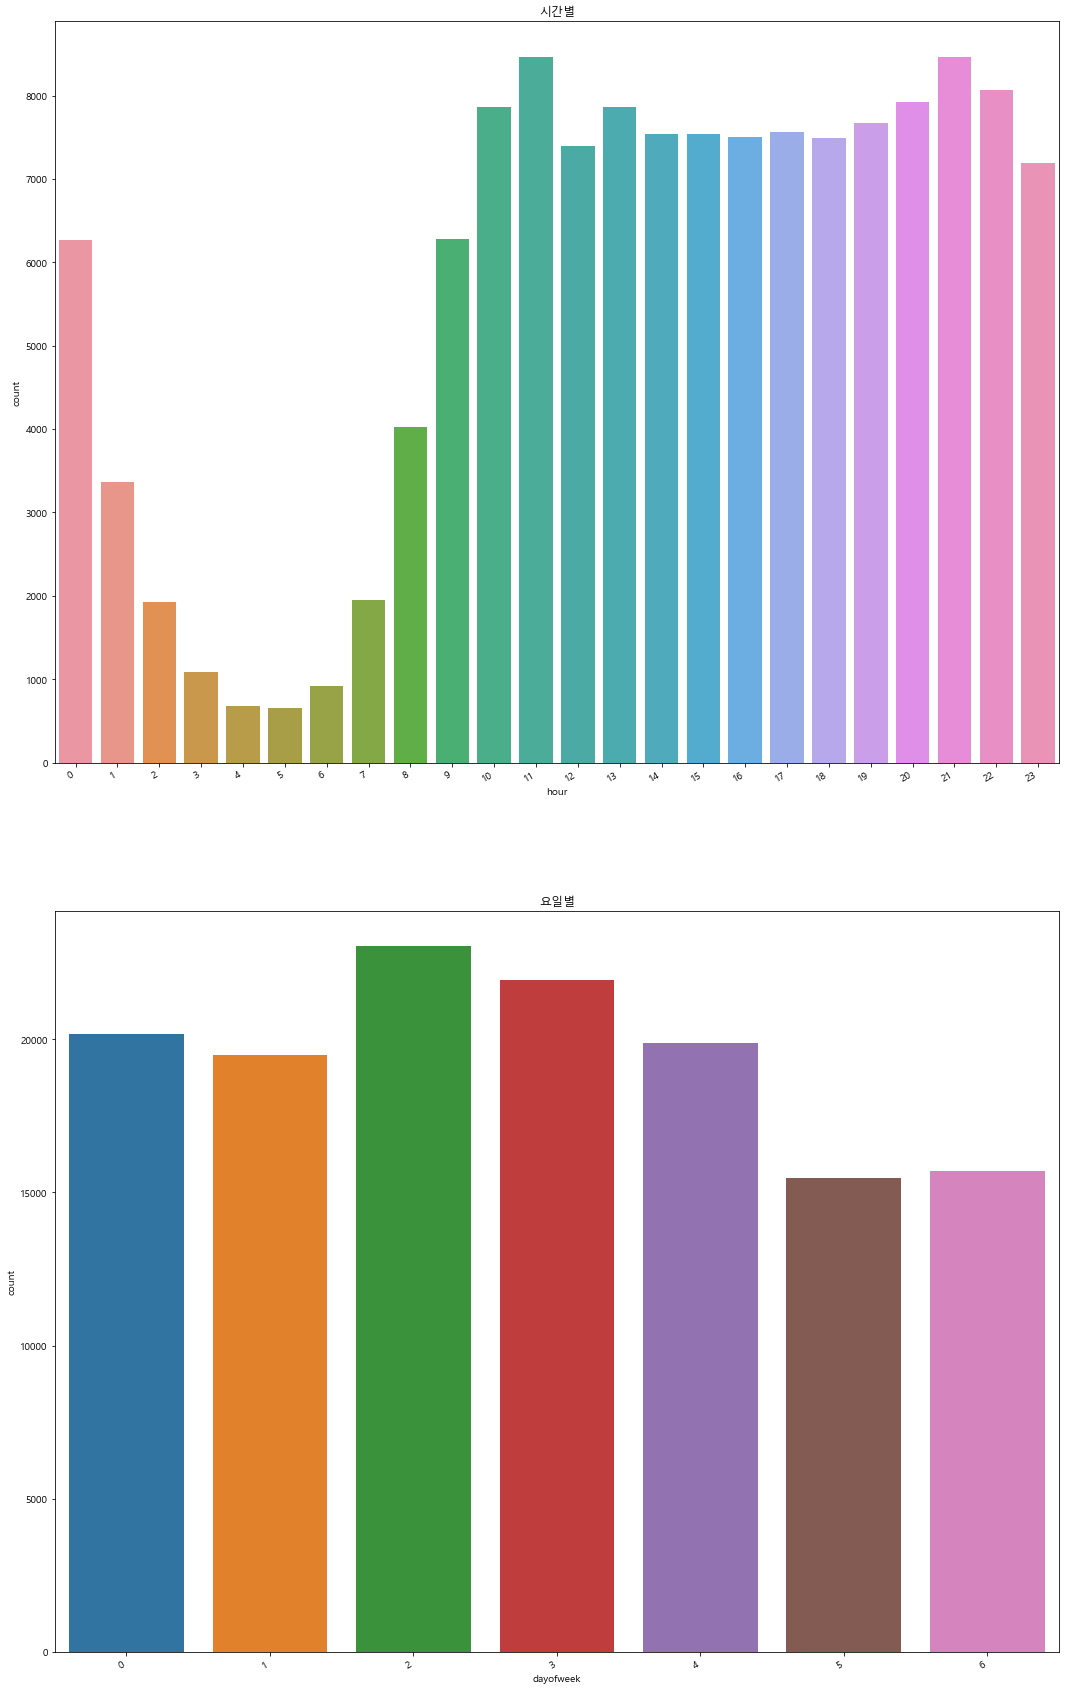

In [7]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.countplot(data=clien, x='hour', ax=axes[0])

#test data
plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='요일별')
sns.countplot(data=clien, x='dayofweek', ax=axes[1])


21시가 글리젠이 제일 많이 되고 있음
11시와 22시가 그다음을 달리고 있음
대체로 10시부터 23시까지는 크게 차이가 나지 않는다.

아침에 업무를 대략 정리하고 점심먹기전 잠깐 글을 쓰는 경우나
퇴근후에 저녁을 먹고 글을 쓰는 경우 때문에 그렇다

대체적으로 월~금까지는 글 리젠수가 비슷하나 목요일이 약간 높은 경향을 나타냄

토요일 일요일은 다른날에 비해 3/4정도 밖에 안됨






In [8]:
jan = clien[clien['month']==1]
dec = clien[clien['month']==12]

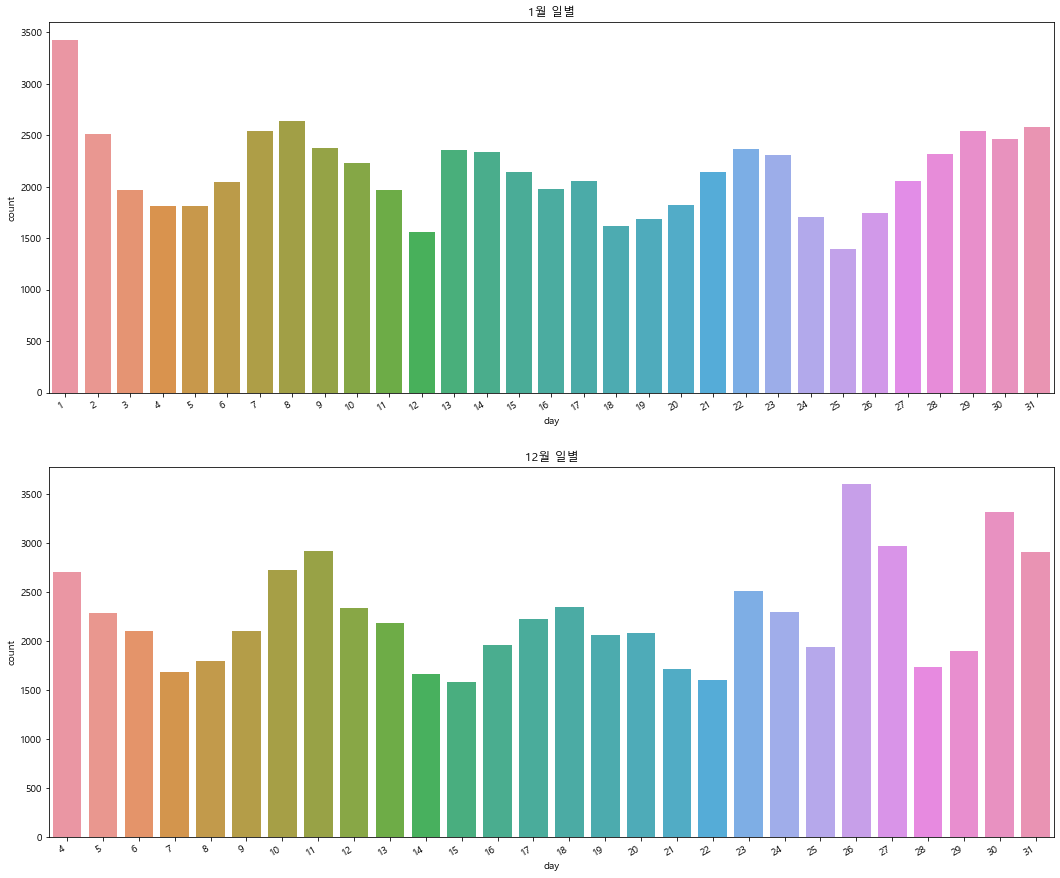

In [9]:
# 다른월의 날짜가 같은것보다는 공휴일 여부가 더 영향을 미칠것 같으므로
# 날짜별 그래프는 월별로 보기로 한다
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,15)

#test data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='1월 일별')
sns.countplot(data=jan, x='day', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='12월 일별')
sns.countplot(data=dec, x='day', ax=axes[1])

1월은 명절 휴일일 24,25,26,27의 글 리젠이 상대적으로 적다 특히 25일은 처참한 정도
1월 1일은 특이사항으로 엄청 높다 (신년축하)
3,4,5 금토일

12월
위에와 마찬가지로 12.28,29 토일등의 리젠수가 적다
특이점으로 26일리젠수가 높다


금요일, 크리스마스 전날인 경우엔 글리젠이 적고 크리스마스 후에는 글리젠이 많다.    
금요일이나, 공휴일 전에는 다음날 쉬는 이점이 있으므로 저녁 약속을 잡아 그런것 같다    
(몇시부터 적어지기 시작하는지 체크 - 평일과 함께 체크)     

In [10]:
clien.describe()


,추천수,리플수,문서번호,조회수int,year,month,day,hour,minute,second,dayofweek,holiday
count,135679.000000,135679.000000,1.356790e+05,135679.000000,135679.000000,135679.000000,135679.000000,135679.000000,135679.00000,135679.000000,135679.000000,135679.000000
mean,5.167329,5.015507,1.445717e+07,3419.717768,2019.533649,6.173085,16.157976,14.107017,29.51445,29.467397,2.818918,0.297017
std,23.539666,11.405724,5.758885e+04,5981.566722,0.498868,5.450787,9.222295,6.211937,17.35564,17.355381,1.921743,0.456946
min,0.000000,0.000000,1.435618e+07,21.000000,2019.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.440778e+07,958.000000,2019.000000,1.000000,8.000000,10.000000,14.00000,14.000000,1.000000,0.000000
50%,0.000000,0.000000,1.445709e+07,1830.000000,2020.000000,2.000000,16.000000,15.000000,30.00000,29.000000,3.000000,0.000000
75%,2.000000,6.000000,1.450723e+07,3388.000000,2020.000000,12.000000,24.000000,19.000000,45.00000,45.000000,4.000000,1.000000
max,1059.000000,463.000000,1.455625e+07,171800.000000,2020.000000,12.000000,31.000000,23.000000,59.00000,59.000000,6.000000,1.000000


최다 추천수는 1059개     
중위값은 0     
평균은 5개     

최다 리플은 463개     
중위값은 0     
평균은 5개     

최다 조회수는 17만회     
중위값은 1830회     
평균은 3419회 로 요약이 가능하다     


In [11]:
clien

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y,380,2019-12-28,2019,12,28,16,31,51,5,NaN,1
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y,149,2019-12-28,2019,12,28,16,30,48,5,NaN,1
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y,831,2019-12-28,2019,12,28,16,30,7,5,NaN,1
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y,450,2019-12-28,2019,12,28,16,28,52,5,NaN,1
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y,1231,2019-12-28,2019,12,28,16,27,11,5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135674,0,모공,근 2~3년 중 가장 크리스마스 분위기 나지 않나요?,0,고고씡,1590,2019-12-05 18:33:50,14362872,N,1590,2019-12-05,2019,12,5,18,33,50,3,NaN,0
135675,0,모공,겨울왕국2 더빙 보러 왔는데 ㄷ ㄷ ㄷ,29,4748,1880,2019-12-05 16:08:26,14362414,N,1880,2019-12-05,2019,12,5,16,8,26,3,NaN,0
135676,0,모공,Sena 케이스는 도대체 언제,0,Steve_,604,2019-12-05 15:23:52,14362233,Y,604,2019-12-05,2019,12,5,15,23,52,3,NaN,0
135677,6,모공,떡검 그리고 토착왜구당 지금 심정,0,4748,2087,2019-12-05 12:56:51,14361714,Y,2087,2019-12-05,2019,12,5,12,56,51,3,NaN,0


In [12]:
perday=clien.pivot_table('조회수int',index = "hour", columns = 'dayofweek',aggfunc='mean')

In [13]:
perday.columns = ['월','화','수','목','금','토','일']

In [14]:
perday

,월,화,수,목,금,토,일
hour,,,,,,,
0,3740.419956,3556.887825,2520.544282,3582.254882,3050.692478,3849.940160,3972.979665
1,4347.247788,4524.930023,4389.785106,4481.489960,4367.702000,4880.967742,5723.561837
2,4703.436578,4112.597173,4376.594502,5022.735632,4523.957082,6285.309237,5773.826415
3,6765.807487,5570.012821,5596.668790,5222.054264,6613.338462,5411.838028,4585.582418
4,7617.109890,6422.049383,5911.554545,5807.252525,6402.080000,7129.517647,5843.389381
5,7828.391304,9281.540000,7866.641026,7061.882979,9932.318681,7904.064516,9106.372093
6,9903.715517,6804.072464,6394.268750,8588.452381,7342.729032,8802.539216,9835.228916
7,7515.033457,6307.475783,6364.455056,7343.244224,7442.358491,6995.333333,9561.739130
8,6197.556738,4085.135447,4074.395380,4543.206128,5222.394612,6302.201005,7269.917563


In [27]:
perday.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

In [40]:
perday['ind'] = perday.index

In [43]:
perday_melted = pd.melt(perday, id_vars = ['ind'])
perday_melted

,ind,variable,value
0,0,월,3740.419956
1,1,월,4347.247788
2,2,월,4703.436578
3,3,월,6765.807487
4,4,월,7617.109890
...,...,...,...
163,19,일,3819.806806
164,20,일,3702.493621
165,21,일,3736.785241
166,22,일,3754.377322


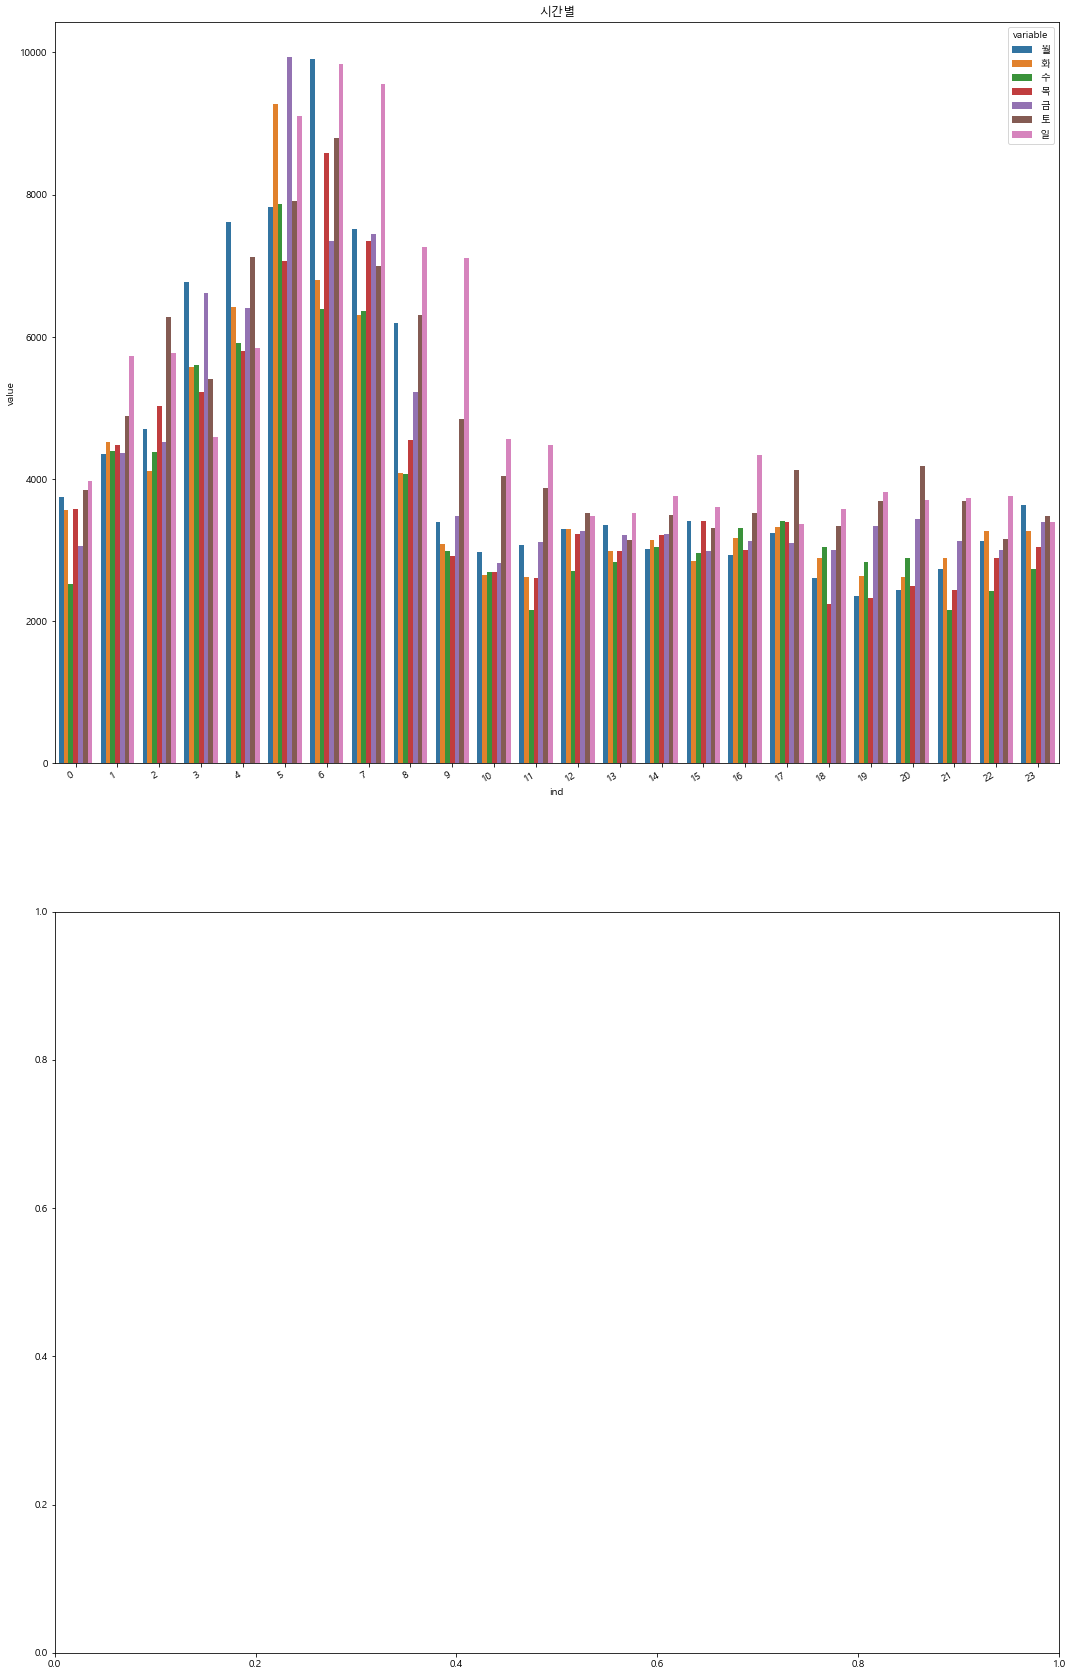

In [51]:
### 멜트해서 hue로 나눠야함???

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.barplot(perday_melted['ind'],perday_melted['value'], data = perday_melted, hue='variable', ax=axes[0])


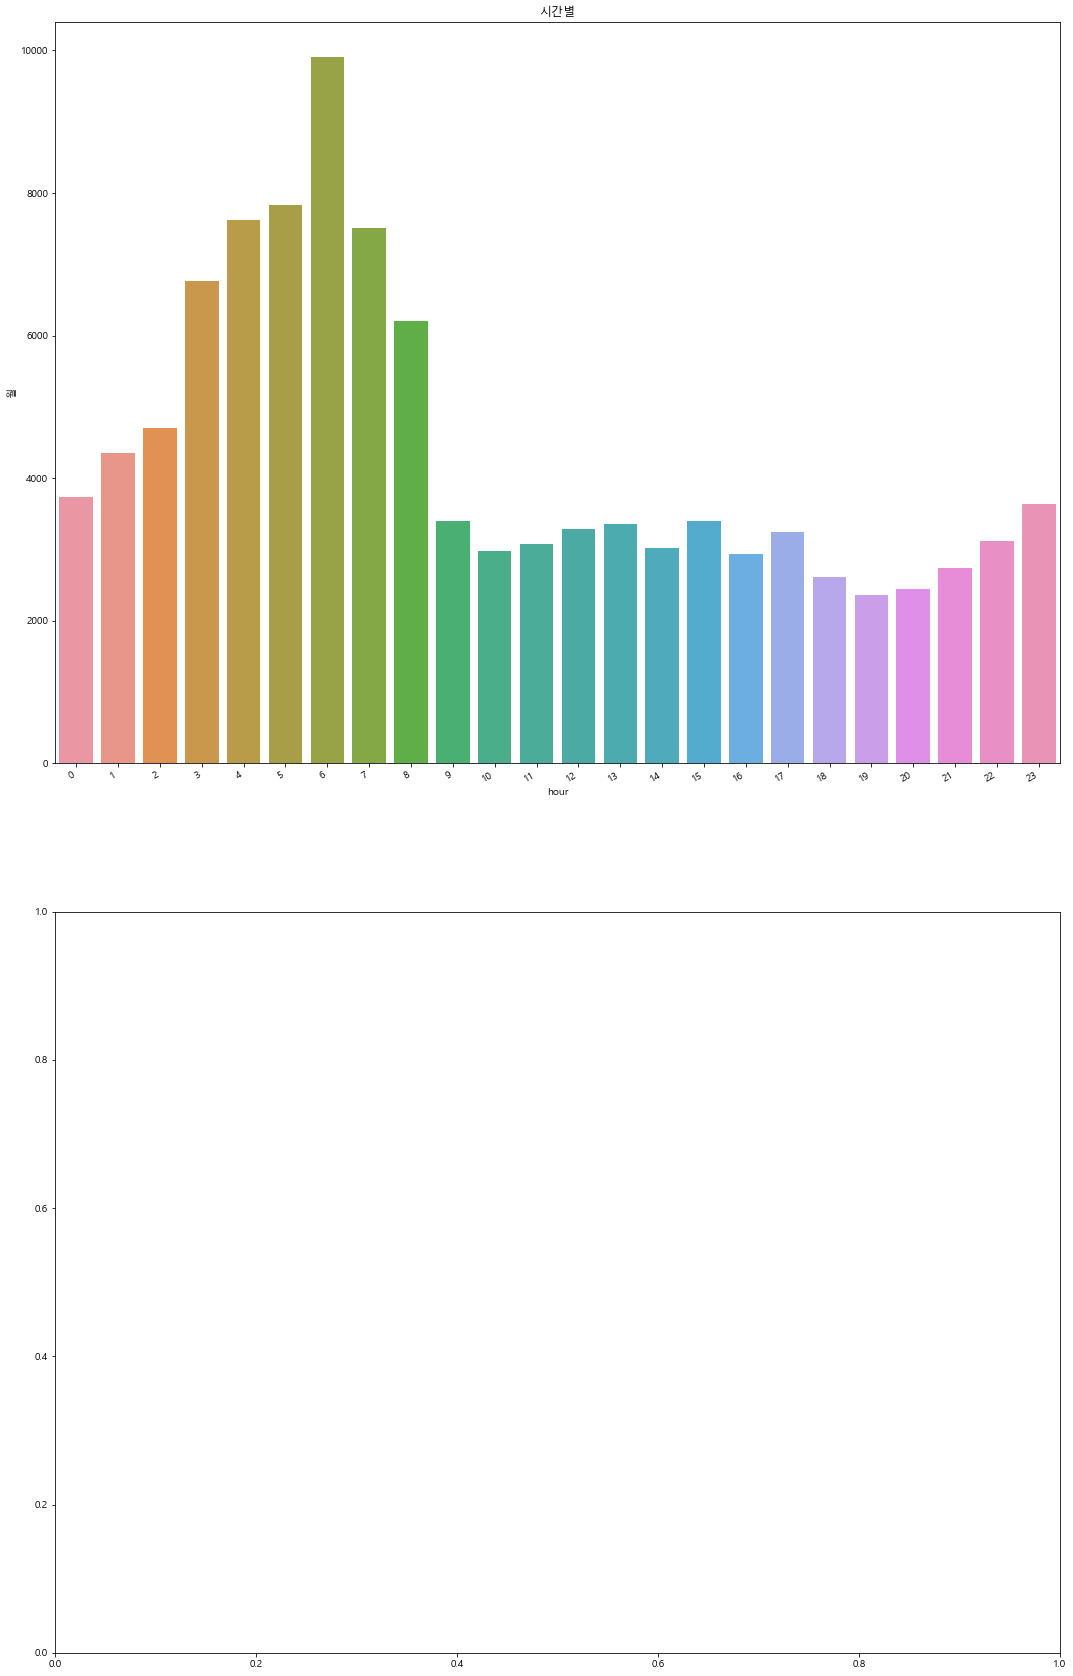

In [49]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,30)

# train data
plt.sca(axes[0])
plt.xticks(rotation=30, ha='right') # x축 글자
axes[0].set(ylabel='Count', title='시간별')
sns.barplot(perday.index, perday['월'], ax=axes[0])


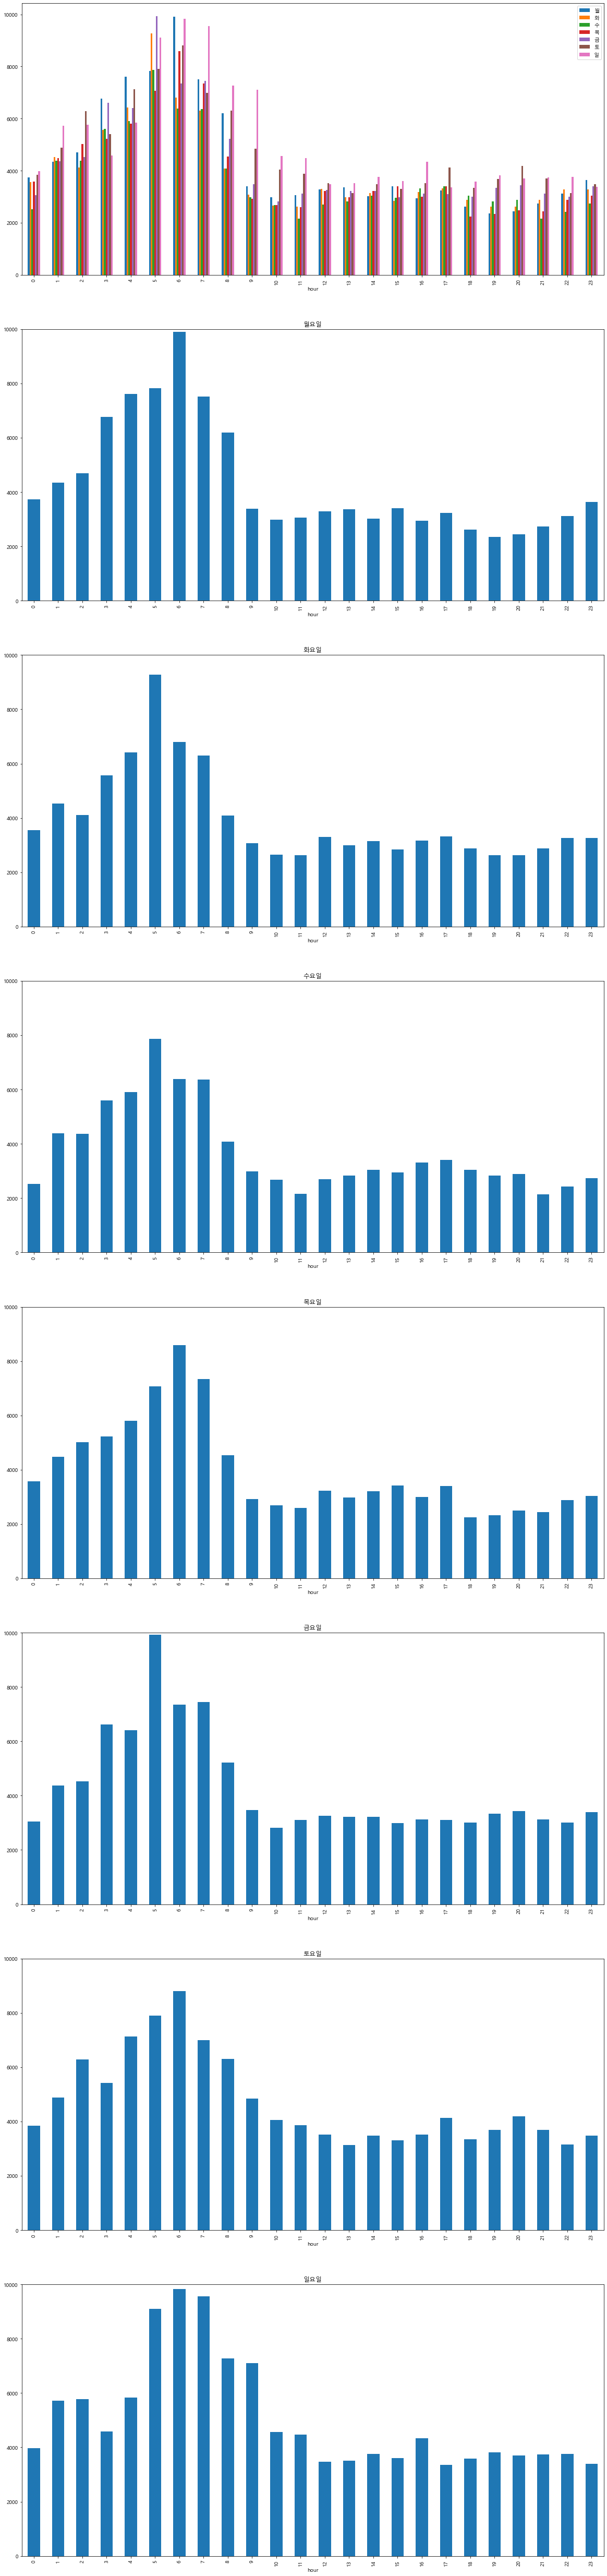

In [15]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다






fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar',ylim =(0,10000) ,title = str(perday.columns[i])+"요일")
    

신기하게도 5~7사이에 쓴글들이 대체로 조회수가 높다
글을 쓴 시점과 읽는 시간과는 차이가 있을수 있으므로
새벽에 쓴글들이 유저들이 아침에 일어났을때 처음으로 접하게 되는 글이다
5,6,7시는 글 리젠이 적어서 몇페이지가 안되기때문에 상대적으로 읽어보기가 쉽다

In [146]:
perday=cliennojan1.pivot_table('추천수',index = "hour", columns = 'dayofweek',aggfunc='mean')
perday.columns = ['월','화','수','목','금','토','일']

In [147]:
perday

,월,화,수,목,금,토,일
hour,,,,,,,
0,3.334891,4.023669,4.562694,5.221118,6.401119,4.630021,2.630882
1,4.808725,5.762821,7.241983,5.602804,8.353333,3.281690,4.334043
2,7.832487,5.323944,4.180328,8.023810,5.943503,9.680723,5.688679
3,11.020408,6.088889,13.864865,9.603774,14.275229,5.432990,2.832117
4,9.869565,8.900000,12.316456,10.108108,10.094595,16.109091,4.134831
5,16.711111,14.343284,16.034483,16.701493,34.815385,9.288136,13.692308
6,20.961538,13.704762,13.500000,18.562044,11.561404,14.516129,4.308824
7,12.673469,13.422053,12.108949,17.160000,14.135802,7.138889,14.390476
8,9.825737,8.374291,9.441176,9.949212,11.316103,11.596838,8.442396


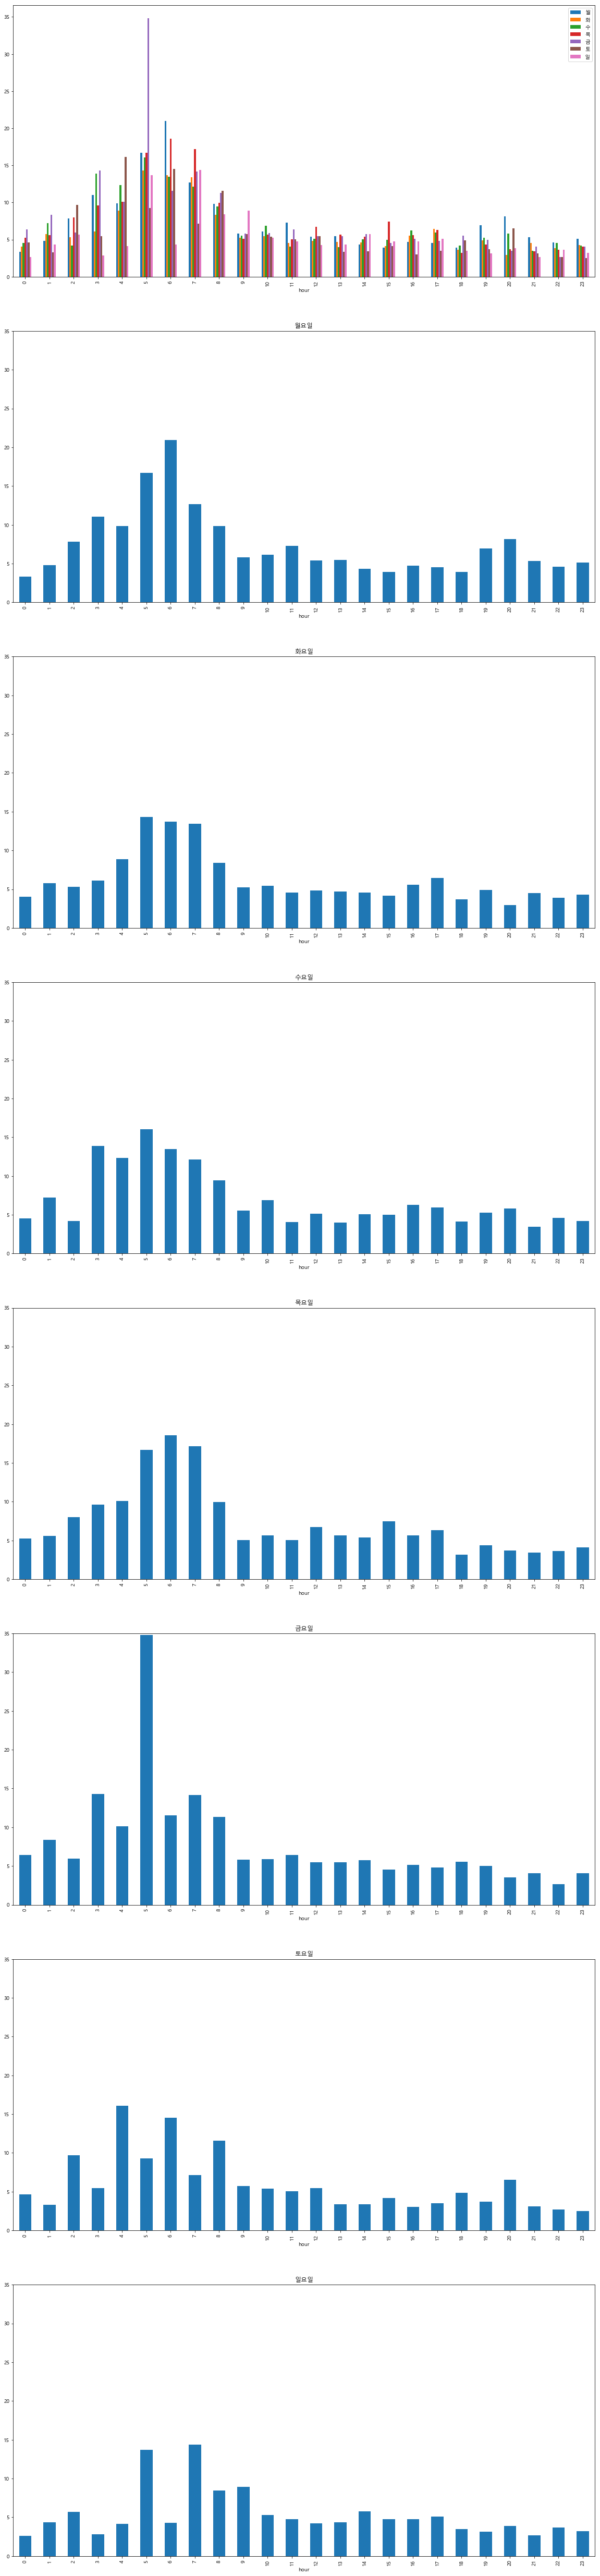

In [150]:
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1], kind = 'bar',ylim =(0,35) ,title = str(perday.columns[i])+"요일")
    

추천도 역시 5,6,7시가 많다

In [151]:
clien

,추천수,게시판,제목,리플수,아이디,조회수,날짜,문서번호,사진유무,조회수int,date,year,month,day,hour,minute,second,dayofweek,설명,holiday
0,0,모공,요즘 신천지 찌라시 근황,0,미나미모리마치,380,2019-12-28 16:31:51,14437898,Y,380,2019-12-28,2019,12,28,16,31,51,5,NaN,1
1,0,모공,조선판 위쳐가 나오면 무슨 느낌일까요?,4,CODE,149,2019-12-28 16:30:48,14437895,Y,149,2019-12-28,2019,12,28,16,30,48,5,NaN,1
2,0,모공,김용민 트윗 근황.jpg,0,umberto_eco,831,2019-12-28 16:30:07,14437894,Y,831,2019-12-28,2019,12,28,16,30,7,5,NaN,1
3,0,모공,올해 극장에서 재밌게 본 영화들.jpg,6,아하라라,450,2019-12-28 16:28:52,14437890,Y,450,2019-12-28,2019,12,28,16,28,52,5,NaN,1
4,10,모공,남친을 오너일가로 장가보낸썰 풉니다,0,곰삭은푸,1231,2019-12-28 16:27:11,14437889,Y,1231,2019-12-28,2019,12,28,16,27,11,5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135674,0,모공,근 2~3년 중 가장 크리스마스 분위기 나지 않나요?,0,고고씡,1590,2019-12-05 18:33:50,14362872,N,1590,2019-12-05,2019,12,5,18,33,50,3,NaN,0
135675,0,모공,겨울왕국2 더빙 보러 왔는데 ㄷ ㄷ ㄷ,29,4748,1880,2019-12-05 16:08:26,14362414,N,1880,2019-12-05,2019,12,5,16,8,26,3,NaN,0
135676,0,모공,Sena 케이스는 도대체 언제,0,Steve_,604,2019-12-05 15:23:52,14362233,Y,604,2019-12-05,2019,12,5,15,23,52,3,NaN,0
135677,6,모공,떡검 그리고 토착왜구당 지금 심정,0,4748,2087,2019-12-05 12:56:51,14361714,Y,2087,2019-12-05,2019,12,5,12,56,51,3,NaN,0


In [60]:
perday=clien.pivot_table('리플수',index = "hour", columns = 'dayofweek',aggfunc='mean')

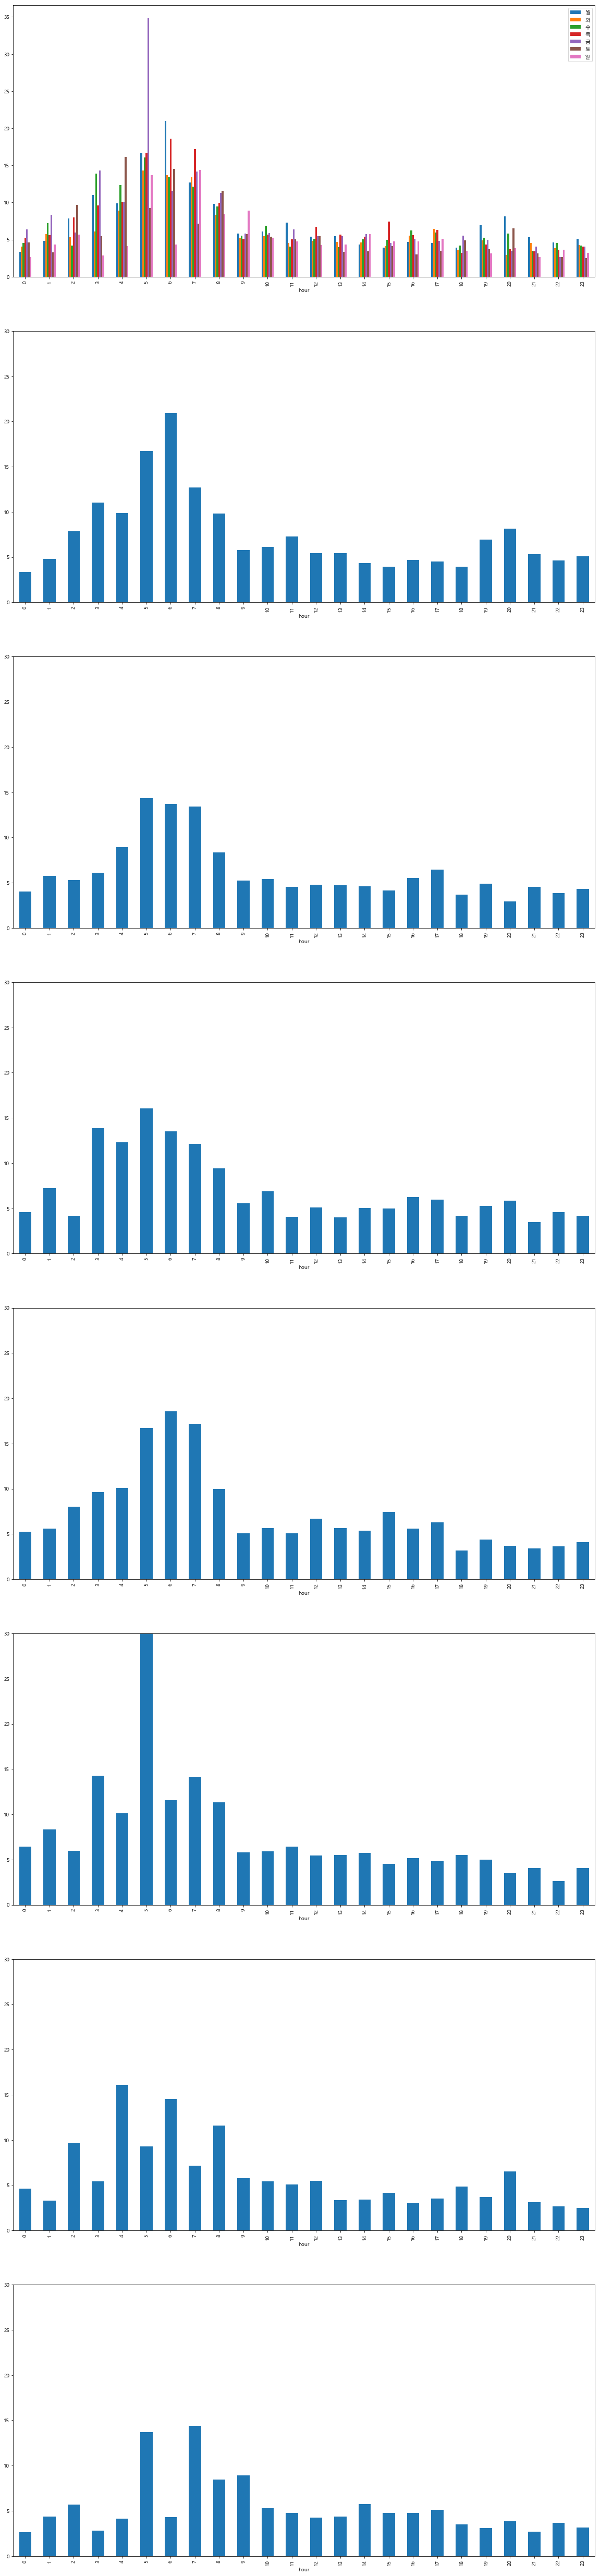

In [155]:
# fig, axes = plt.subplots(8,1, figsize = (20,90))
# axes
# axes[0].plot(perday)
# # for i in range(len(perday.columns)):
# #     axes[i,0].plot(kind='bar')
# for i in range(len(perday.columns)):
#     axes[int(i)+(1)].plot(perday.iloc[:,i])

# 위와 아래는 동일함
# 아래대로 써야 타입이랑 바꿔주기 쉽다
fig, axes = plt.subplots(8,1, figsize = (20,90))
axes
perday.plot(ax= axes[0], kind='bar')
# for i in range(len(perday.columns)):
#     axes[i,0].plot(kind='bar')
for i in range(len(perday.columns)):
    perday.iloc[:,i].plot(ax = axes[int(i)+1],ylim=(0,30), kind = 'bar')
    

비슷한 양상을 보임
약간의 시간차는 잇지만 5~6 시쯤 올린글에 대해서 
수요일과 금요일 새벽이 리플이 잘 달렸다

In [158]:
clien.corr()

,추천수,리플수,문서번호,조회수int,year,month,day,hour,minute,second,dayofweek,holiday
추천수,1.000000,0.007017,0.010999,0.562821,0.016801,-0.016971,-0.005690,-0.043001,0.001366,0.003587,-0.006835,-0.014374
리플수,0.007017,1.000000,0.015349,0.014205,0.018890,-0.018809,-0.004284,-0.045879,0.002299,0.000009,-0.000413,-0.016935
문서번호,0.010999,0.015349,1.000000,0.044374,0.862330,-0.855087,0.232760,0.011371,0.000835,0.005823,0.020899,0.102473
조회수int,0.562821,0.014205,0.044374,1.000000,0.049634,-0.049526,-0.003772,-0.078922,0.003807,0.003513,0.047753,0.058041
year,0.016801,0.018890,0.862330,0.049634,1.000000,-0.999331,-0.180363,-0.004765,-0.003400,0.005590,0.037188,0.102348
month,-0.016971,-0.018809,-0.855087,-0.049526,-0.999331,1.000000,0.169422,0.003929,0.003226,-0.005681,-0.034011,-0.096714
day,-0.005690,-0.004284,0.232760,-0.003772,-0.180363,0.169422,1.000000,0.014216,0.009414,0.002670,-0.089949,-0.088240
hour,-0.043001,-0.045879,0.011371,-0.078922,-0.004765,0.003929,0.014216,1.000000,0.011716,0.000421,0.001870,0.017481
minute,0.001366,0.002299,0.000835,0.003807,-0.003400,0.003226,0.009414,0.011716,1.000000,0.001732,0.006086,-0.001188
second,0.003587,0.000009,0.005823,0.003513,0.005590,-0.005681,0.002670,0.000421,0.001732,1.000000,0.007642,0.002982


In [163]:
clien.loc[clien['사진유무']=="Y","사진유무"] = 1
clien.loc[clien['사진유무']=="N","사진유무"] = 0

In [173]:
clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr()

,추천수,리플수,사진유무,조회수int,dayofweek,holiday
추천수,1.000000,0.007017,-0.001184,0.562821,-0.006835,-0.014374
리플수,0.007017,1.000000,0.007033,0.014205,-0.000413,-0.016935
사진유무,-0.001184,0.007033,1.000000,0.017243,0.040316,0.021617
조회수int,0.562821,0.014205,0.017243,1.000000,0.047753,0.058041
dayofweek,-0.006835,-0.000413,0.040316,0.047753,1.000000,0.633719
holiday,-0.014374,-0.016935,0.021617,0.058041,0.633719,1.000000


히트맵

In [60]:
mask = np.array(clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr())
mask[np.tril_indices_from(mask)] = False #array의 1 값을 기준으로 상위부분 출력제외

mask

array([[ 0.00000000e+00,  7.01698041e-03,  5.62820946e-01,
        -6.83545230e-03, -1.43738352e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.42052040e-02,
        -4.12925876e-04, -1.69346309e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.77532723e-02,  5.80408267e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.33719480e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

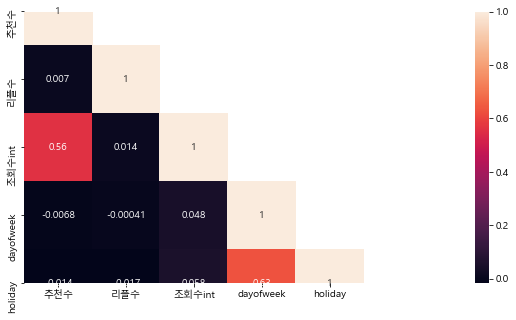

In [61]:
# 상관계수의 Heatmap
fig, ax = plt.subplots()
fig.set_size_inches(40,5)
sns.heatmap(clien[['추천수', '리플수', '사진유무', '조회수int','dayofweek', 'holiday']].corr(), 
            mask = mask, vmax=1, square=True, annot=True )
